In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from scipy.stats import sem, linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LoadData File
data_file = "../1_Input/DF_Interim/World_Water_vs_Violence.csv"

# Load file
water_vs_violence = pd.read_csv(data_file)

wv_df = water_vs_violence.dropna()

wv_df.head()

,Country,% Access,Total water withdrawal per capita (m³ per person per year),Population,Conflict Count,Conflict Deaths,Conflict Death Rate,Homocide Count,Homocide Rate
0,Afghanistan,36.228000,1355.433333,32956936.0,1169.777778,6669.777778,20.237858,712.0,2.4
2,Algeria,88.376923,161.857143,40026405.0,117.111111,409.444444,1.022936,516.0,1.5
5,Angola,46.453846,41.073333,25426102.0,25.352941,245.058824,0.963808,3426.0,19.0
8,Armenia,94.862499,905.800000,3022275.0,3.000000,5.500000,0.181982,116.0,3.6
12,Azerbaijan,76.661539,1366.750000,9812656.0,14.562500,26.500000,0.270059,206.0,2.2


In [3]:
# check which countries affected by decrease in precipitation due to climate change are in the dataset:
countries = list(wv_df['Country'])
for i in np.arange(len(countries)):
    if countries[i] in ['Guatemala','Nicaragua', 'Trinidad and Tobago', 'Grenada', 'Norfold Island (Aus.)']:
        print(countries[i])
        print(i)
# Can only find Guatemala in row 30
# Also made sure by checking the Country field eye


Guatemala
30


slope:  -1.2157488405731662
R-squared: 0.02267059230276729


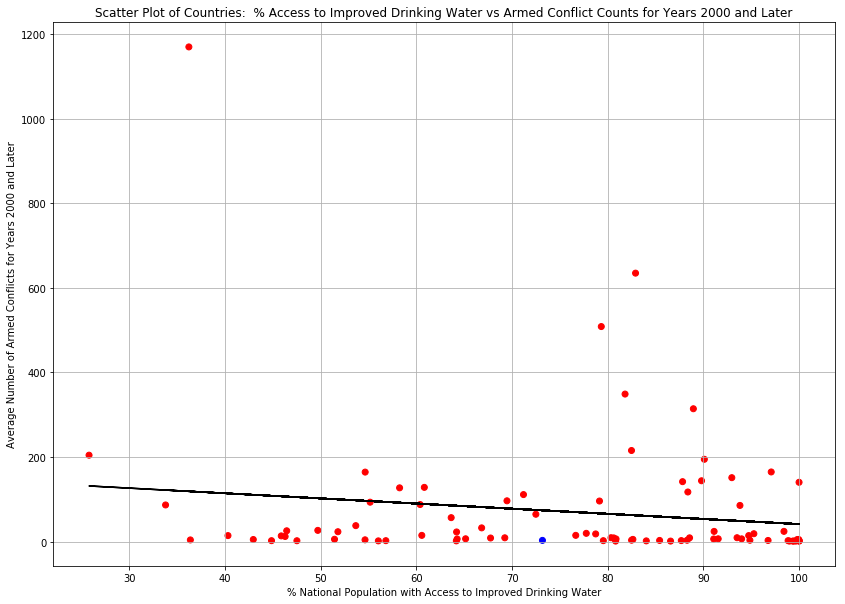

In [4]:
# Create scatterplot of % Access vs Conflict Count

x = wv_df["% Access"]
y = wv_df["Conflict Count"]

# make a color vector with Guatemala as blue color and the rest as red

country_colors = ['r'] * 29
country_colors.append('b')
country_colors.extend(['r'] * (len(x) - 30))

plt.scatter(x, y, color=country_colors)
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Armed Conflict Counts for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Number of Armed Conflicts for Years 2000 and Later")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)


plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Armed Conflict.png")

# Show the Figure
plt.show()

slope:  -0.08669705081766045
R-squared: 0.06476299163038376


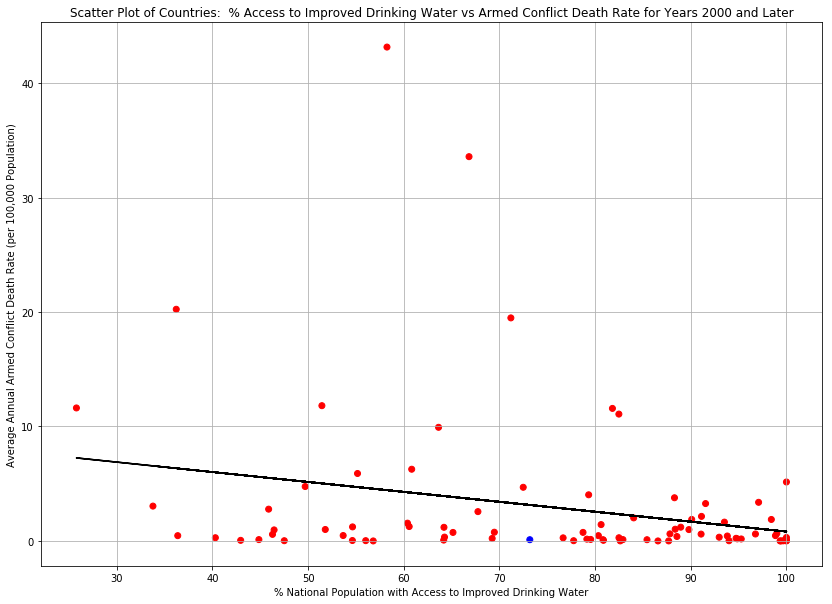

In [5]:
# Create scatterplot of % Access vs Conflict Death Rate

x = wv_df["% Access"]
y = wv_df["Conflict Death Rate"]


plt.scatter(x, y, color=country_colors)
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Armed Conflict Death Rate for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Annual Armed Conflict Death Rate (per 100,000 Population)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)


plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Armed Conflict Rate.png")

# Show the Figure
plt.show()

slope:  -0.08558267316701879
R-squared: 0.00995250262067458


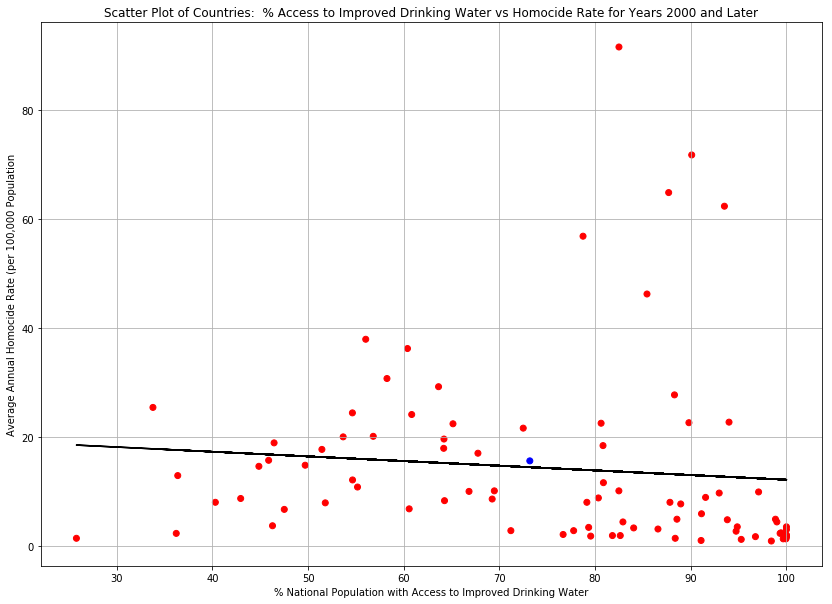

In [6]:
# Create scatterplot of % Access vs Homocide Rate

x = wv_df["% Access"]
y = wv_df["Homocide Rate"]

plt.scatter(x, y, color=country_colors)
plt.title('Scatter Plot of Countries:  % Access to Improved Drinking Water vs Homocide Rate for Years 2000 and Later')
plt.xlabel("% National Population with Access to Improved Drinking Water")
plt.ylabel("Average Annual Homocide Rate (per 100,000 Population")

plt.grid()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Percent Access Improved Water vs Homocide Rate.png")

# Show the Figure
plt.show()

slope:  0.07135037741667694
R-squared: 0.05900469582275047


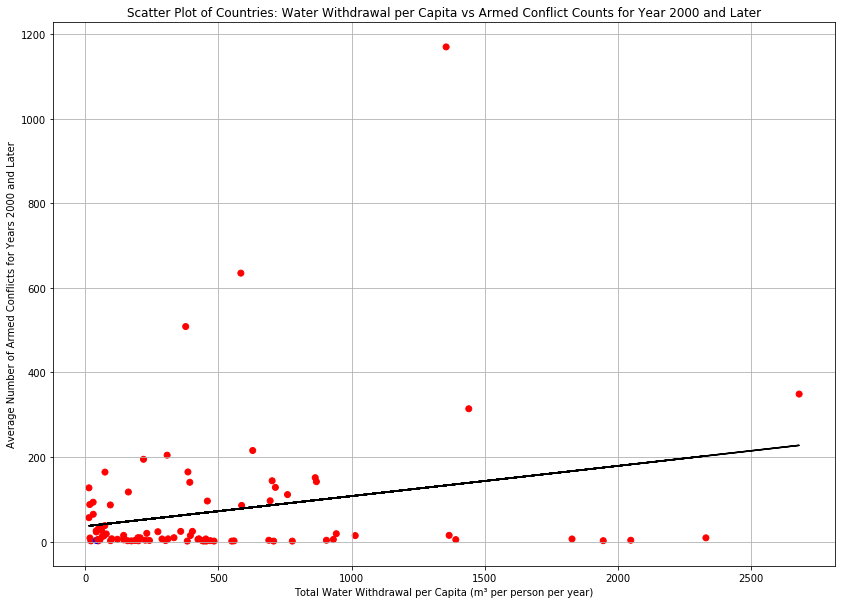

In [7]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Count

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Conflict Count"]

plt.scatter(x, y, color=country_colors)
plt.title('Scatter Plot of Countries: Water Withdrawal per Capita vs Armed Conflict Counts for Year 2000 and Later')
plt.xlabel("Total Water Withdrawal per Capita (m³ per person per year)")
plt.ylabel("Average Number of Armed Conflicts for Years 2000 and Later")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Armed Conflict Counts.png")

# Show the Figure
plt.show()

slope:  -0.00016674059226568942
R-squared: 0.00018101719081127323


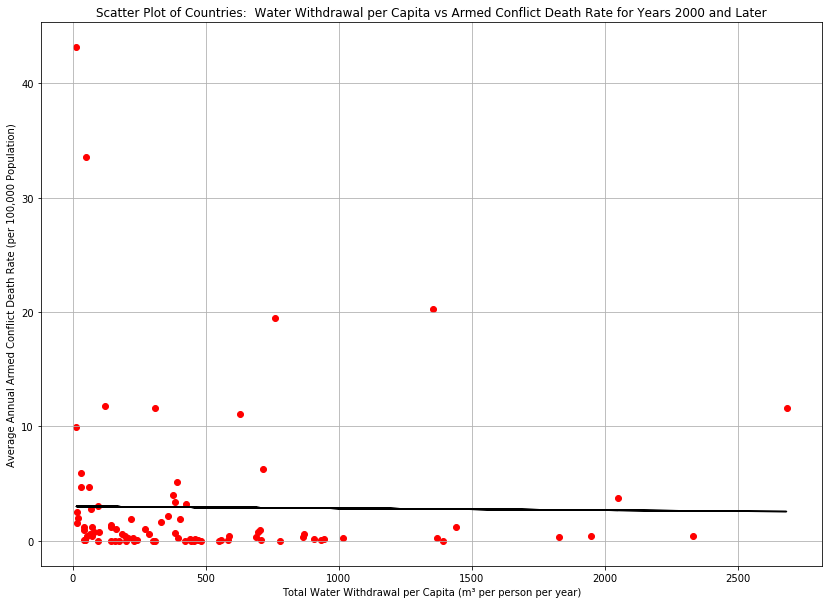

In [8]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Count

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Conflict Death Rate"]

plt.scatter(x, y, color='r')
plt.title('Scatter Plot of Countries:  Water Withdrawal per Capita vs Armed Conflict Death Rate for Years 2000 and Later')
plt.xlabel("Total Water Withdrawal per Capita (m³ per person per year)")
plt.ylabel("Average Annual Armed Conflict Death Rate (per 100,000 Population)")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Armed Conflict Death Rate.png")

# Show the Figure
plt.show()

slope:  -0.008005554324255157
R-squared: 0.06580551785285986


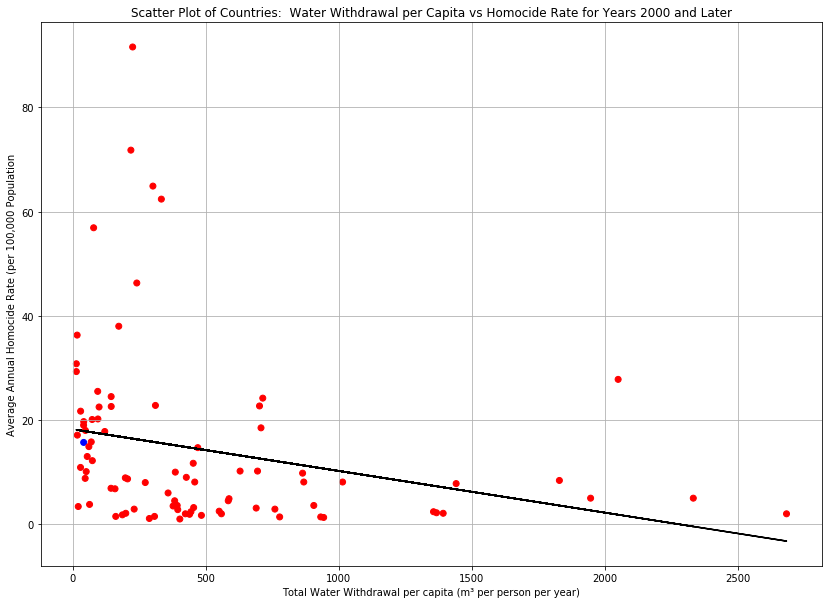

In [9]:
# Create scatterplot of Water Withdrawal per Capita vs Conflict Death Rte

x = wv_df["Total water withdrawal per capita (m³ per person per year)"]
y = wv_df["Homocide Rate"]

plt.scatter(x, y, color=country_colors)
plt.title('Scatter Plot of Countries:  Water Withdrawal per Capita vs Homocide Rate for Years 2000 and Later')
plt.xlabel("Total Water Withdrawal per capita (m³ per person per year)")
plt.ylabel("Average Annual Homocide Rate (per 100,000 Population")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k")

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("slope: ", slope)
print("R-squared:", r_value*r_value)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig("../6_Output/Water Withdrawal per Capita vs Homocide Rate.png")

# Show the Figure
plt.show()

In [10]:
# LoadData File Overall Conflict
worldconflict_file = "../1_Input/DF_Interim/worldconflict_data.csv"

# Load file
conflict_df = pd.read_csv(worldconflict_file)

conflict_df.head()

,Conflict Id,Year,Latitude,Longitude,Country,Country Id,Best Death Estimate
0,217843,2002,43.507200,46.334000,Russian Federation,365,14
1,175934,2002,32.206406,35.286583,Israel,666,7
2,175981,2002,31.506792,35.027717,Israel,666,3
3,175983,2002,32.609067,35.289202,Israel,666,1
4,175984,2002,31.902561,35.195547,Israel,666,3


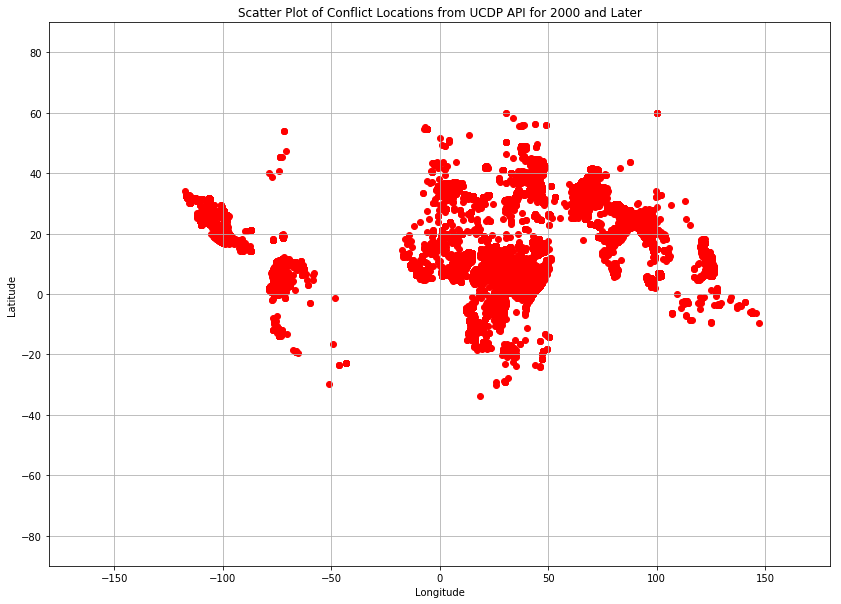

In [11]:
# Scatterplot to show locations of the recorded conflicts
plt.scatter(conflict_df["Longitude"], conflict_df["Latitude"], color='r')
plt.title('Scatter Plot of Conflict Locations from UCDP API for 2000 and Later')
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.grid()

plt.gcf().set_size_inches(14, 10)

# Save the Figure
plt.savefig('../../projWANGRY/6_Output/Recorded Conflict Locations from UCDP API.png')

# Show the Figure
plt.show()